In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from neuralforecast.utils import AirPassengersDF
from neuralforecast import NeuralForecast
from neuralforecast.models import NHITS

import warnings
warnings.filterwarnings("ignore")

# data

In [9]:
Y_df = AirPassengersDF
print(Y_df)
print()
print(Y_df.shape)
print()
print(Y_df["unique_id"].value_counts())

     unique_id         ds      y
0          1.0 1949-01-31  112.0
1          1.0 1949-02-28  118.0
2          1.0 1949-03-31  132.0
3          1.0 1949-04-30  129.0
4          1.0 1949-05-31  121.0
..         ...        ...    ...
139        1.0 1960-08-31  606.0
140        1.0 1960-09-30  508.0
141        1.0 1960-10-31  461.0
142        1.0 1960-11-30  390.0
143        1.0 1960-12-31  432.0

[144 rows x 3 columns]

(144, 3)

1.0    144
Name: unique_id, dtype: int64


# model

In [10]:
horizon = 12
nf = NeuralForecast(
    models = [
        NHITS(
            h = horizon,
            input_size = 2 * horizon,
            max_steps = 1000,
            n_freq_downsample = [2, 1, 1],
            mlp_units = 3 * [[1024, 1024]],
        )
    ],
    freq = "M",
)
nf.fit(df = Y_df, val_size = horizon)

Global seed set to 1
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params
-----------------------------------------------
0 | loss         | MAE           | 0     
1 | padder_train | ConstantPad1d | 0     
2 | scaler       | TemporalNorm  | 0     
3 | blocks       | ModuleList    | 9.6 M 
-----------------------------------------------
9.6 M     Trainable params
0         Non-trainable params
9.6 M     Total params
38.413    Total estimated model p

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.


# model predicting

In [21]:
Y_hat_insample = nf.predict_insample(step_size = horizon)
with pd.option_context("display.max_rows", None):
    print(Y_hat_insample)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

                  ds     cutoff       NHITS      y
unique_id                                         
1.0       1949-01-31 1948-12-31    0.172645  112.0
1.0       1949-02-28 1948-12-31    0.254529  118.0
1.0       1949-03-31 1948-12-31    0.271205  132.0
1.0       1949-04-30 1948-12-31    0.425967  129.0
1.0       1949-05-31 1948-12-31    0.504878  121.0
1.0       1949-06-30 1948-12-31    0.362378  135.0
1.0       1949-07-31 1948-12-31    0.592494  148.0
1.0       1949-08-31 1948-12-31    0.612901  148.0
1.0       1949-09-30 1948-12-31    0.822346  136.0
1.0       1949-10-31 1948-12-31    0.886277  119.0
1.0       1949-11-30 1948-12-31    0.773343  104.0
1.0       1949-12-31 1948-12-31    0.773657  118.0
1.0       1950-01-31 1949-12-31  121.938606  115.0
1.0       1950-02-28 1949-12-31  123.674934  126.0
1.0       1950-03-31 1949-12-31  132.974060  141.0
1.0       1950-04-30 1949-12-31  136.778397  135.0
1.0       1950-05-31 1949-12-31  136.814301  125.0
1.0       1950-06-30 1949-12-31

# result

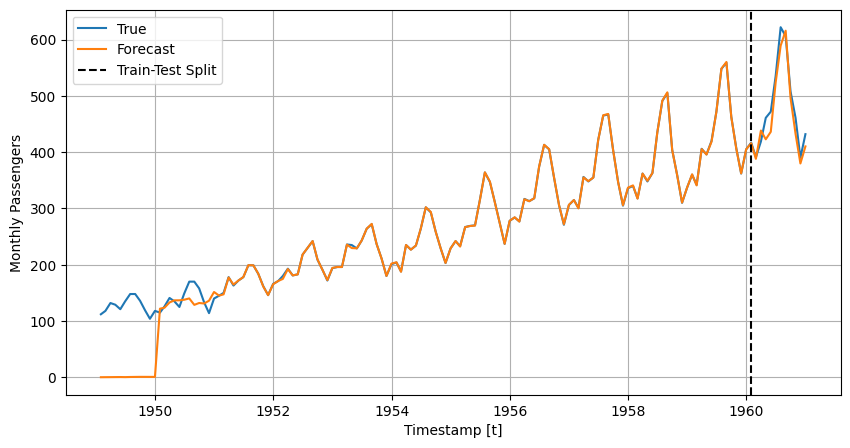

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(Y_hat_insample['ds'], Y_hat_insample['y'], label='True')
plt.plot(Y_hat_insample['ds'], Y_hat_insample['NHITS'], label='Forecast')
plt.axvline(Y_hat_insample['ds'].iloc[-12], color='black', linestyle='--', label='Train-Test Split')
plt.xlabel('Timestamp [t]')
plt.ylabel('Monthly Passengers')
plt.grid()
plt.legend()